In [44]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from acquire import opsd

In [2]:
from env import username, host, password


def get_connection(db, user=username, host=host, password=password):
    
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'


def acquire_store():
    
    filename = 'store.csv'
    
    if os.path.exists(filename):
        
        return pd.read_csv(filename)
    
    else:
        
        query = '''
                SELECT sale_date, sale_amount,
                item_brand, item_name, item_price,
                store_address, store_zipcode
                FROM sales
                LEFT JOIN items USING(item_id)
                LEFT JOIN stores USING(store_id)
                '''
        
        url = get_connection(db='tsa_item_demand')
        
        df = pd.read_sql(query, url)
        
        df.to_csv(filename, index=False)
        
        return df

In [12]:
df=acquire_store()

In [13]:
df.head()

,sale_date,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode
0,2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
1,2013-01-02,11,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2,2013-01-03,14,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
3,2013-01-04,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
4,2013-01-05,10,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253


# Convert date column to datetime format.

In [14]:
df['sale_date']=pd.to_datetime(df['sale_date'])

In [15]:
df.head()

,sale_date,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode
0,2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
1,2013-01-02,11,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2,2013-01-03,14,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
3,2013-01-04,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
4,2013-01-05,10,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253


# Set the index to be the datetime variable.

In [16]:
df=df.set_index('sale_date')


,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode
sale_date,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2013-01-02,11,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2013-01-03,14,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2013-01-04,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2013-01-05,10,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
...,...,...,...,...,...,...
2017-12-27,63,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,8503 NW Military Hwy,78231
2017-12-28,59,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,8503 NW Military Hwy,78231
2017-12-29,74,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,8503 NW Military Hwy,78231


In [17]:
df=df.sort_index()

In [18]:
df.head()

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode
sale_date,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2013-01-01,26,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,12018 Perrin Beitel Rd,78217
2013-01-01,27,Mama Marys,Pizza Sauce,4.65,12018 Perrin Beitel Rd,78217
2013-01-01,54,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,15000 San Pedro Ave,78232
2013-01-01,35,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,735 SW Military Dr,78221


# Plot the distribution of sale_amount and item_price.

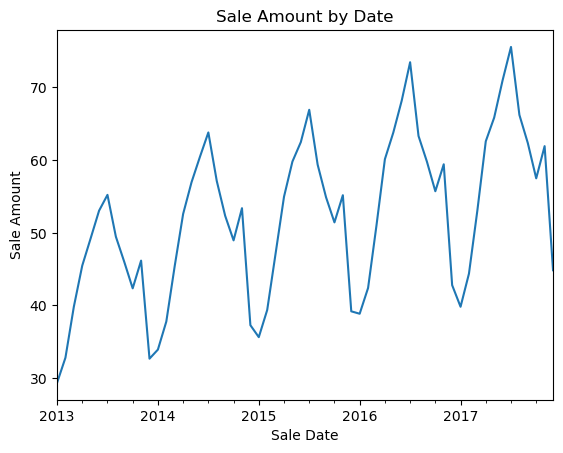

In [26]:
df['sale_amount'].resample('M').mean().plot()
plt.xlabel('Sale Date')
plt.ylabel('Sale Amount')
plt.title('Sale Amount by Date')
plt.show()

# Add a 'month' and 'day of week' column to your dataframe.

In [28]:
df['month']= df.index.strftime('%B')

In [31]:
df['day_of_week']= df.index.strftime('%A')

In [32]:
df.head()

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,month,day_of_week
sale_date,,,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,Tuesday
2013-01-01,26,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,12018 Perrin Beitel Rd,78217,January,Tuesday
2013-01-01,27,Mama Marys,Pizza Sauce,4.65,12018 Perrin Beitel Rd,78217,January,Tuesday
2013-01-01,54,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,15000 San Pedro Ave,78232,January,Tuesday
2013-01-01,35,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,735 SW Military Dr,78221,January,Tuesday


# Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [33]:
df['sales_total']= df['sale_amount']*df['item_price']

In [34]:
df.head()

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,Tuesday,10.92
2013-01-01,26,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,12018 Perrin Beitel Rd,78217,January,Tuesday,218.40
2013-01-01,27,Mama Marys,Pizza Sauce,4.65,12018 Perrin Beitel Rd,78217,January,Tuesday,125.55
2013-01-01,54,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,15000 San Pedro Ave,78232,January,Tuesday,453.60
2013-01-01,35,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,735 SW Military Dr,78221,January,Tuesday,294.00


# Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [35]:
def prep_store(df):
    df['sale_date']=pd.to_datetime(df['sale_date'])
    df=df.set_index('sale_date')
    df=df.sort_index()
    df['month']= df.index.strftime('%B')
    df['day_of_week']= df.index.strftime('%A')
    df['sales_total']= df['sale_amount']*df['item_price']
    return df


    
def store_plot():
    df['sale_amount'].resample('M').mean().plot()
    plt.xlabel('Sale Date')
    plt.ylabel('Sale Amount')
    plt.title('Sale Amount by Date')
    plt.show()

# Convert date column to datetime format.

In [46]:
op=opsd()

In [47]:
op.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [48]:
op['Date']=pd.to_datetime(op['Date'])

# Set the index to be the datetime variable.

In [49]:
op=op.set_index('Date')

In [50]:
op.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


# Plot the distribution of each of your variables.

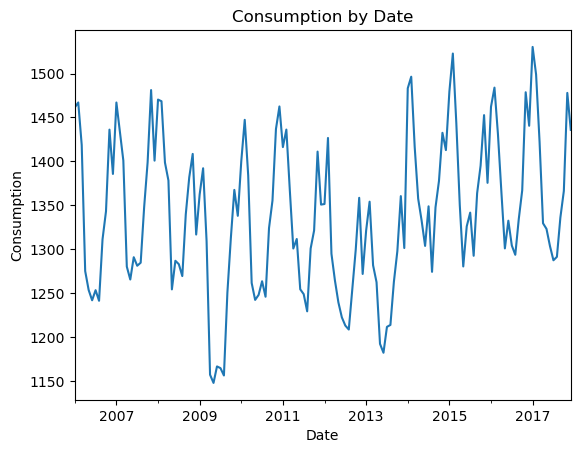

In [53]:
op['Consumption'].resample('M').mean().plot()
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.title('Consumption by Date')
plt.show()

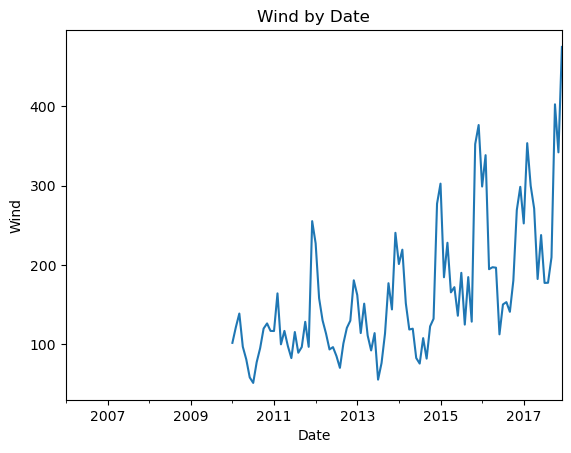

In [55]:
op['Wind'].resample('M').mean().plot()
plt.xlabel('Date')
plt.ylabel('Wind')
plt.title('Wind by Date')
plt.show()

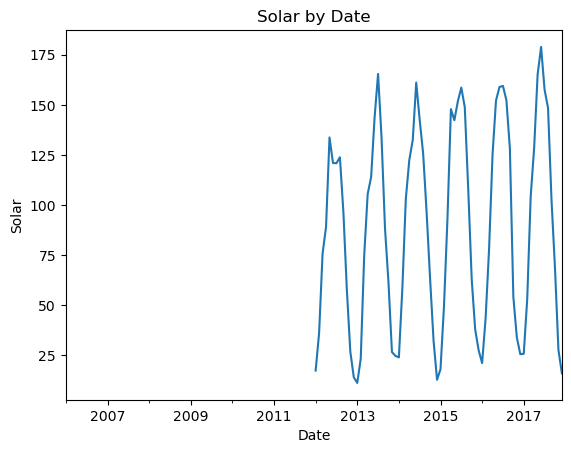

In [56]:
op['Solar'].resample('M').mean().plot()
plt.xlabel('Date')
plt.ylabel('Solar')
plt.title('Solar by Date')
plt.show()

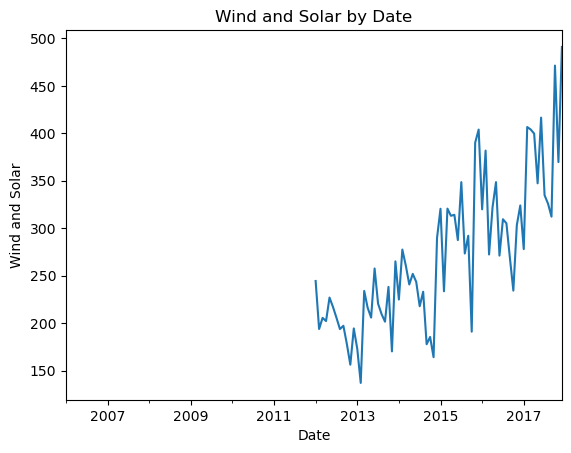

In [57]:
op['Wind+Solar'].resample('M').mean().plot()
plt.xlabel('Date')
plt.ylabel('Wind and Solar')
plt.title('Wind and Solar by Date')
plt.show()

# Add a month and a year column to your dataframe.

In [59]:
op['month']=op.index.strftime('%B')
op['year']=op.index.strftime('%Y')

In [61]:
op.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,January,2006
2006-01-02,1380.521,NaN,NaN,NaN,January,2006
2006-01-03,1442.533,NaN,NaN,NaN,January,2006
2006-01-04,1457.217,NaN,NaN,NaN,January,2006
2006-01-05,1477.131,NaN,NaN,NaN,January,2006


# Fill any missing values.

In [63]:
op=op.fillna(0)

In [64]:
op.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,January,2006
2006-01-02,1380.521,0.0,0.0,0.0,January,2006
2006-01-03,1442.533,0.0,0.0,0.0,January,2006
2006-01-04,1457.217,0.0,0.0,0.0,January,2006
2006-01-05,1477.131,0.0,0.0,0.0,January,2006


# Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [71]:
def get_opsd():
    op=opsd()
    op['Date']=pd.to_datetime(op['Date'])
    op=op.set_index('Date')
    op['month']=op.index.strftime('%B')
    op['year']=op.index.strftime('%Y')
    op=op.fillna(0)
    return op


def opsd_plots(op):
    op['Consumption'].resample('M').mean().plot()
    plt.xlabel('Date')
    plt.ylabel('Consumption')
    plt.title('Consumption by Date')
    plt.show()
    
    op['Wind'].resample('M').mean().plot()
    plt.xlabel('Date')
    plt.ylabel('Wind')
    plt.title('Wind by Date')
    plt.show()
    
    op['Solar'].resample('M').mean().plot()
    plt.xlabel('Date')
    plt.ylabel('Solar')
    plt.title('Solar by Date')
    plt.show()
    
    op['Wind+Solar'].resample('M').mean().plot()
    plt.xlabel('Date')
    plt.ylabel('Wind and Solar')
    plt.title('Wind and Solar by Date')
    plt.show()
    
    op['Wind'].resample('M').mean().plot()
    op['Solar'].resample('M').mean().plot()
    plt.xlabel('Date')
    plt.ylabel('Wind and Solar')
    plt.title('Wind and Solar by Date')
    plt.legend()
    plt.show()

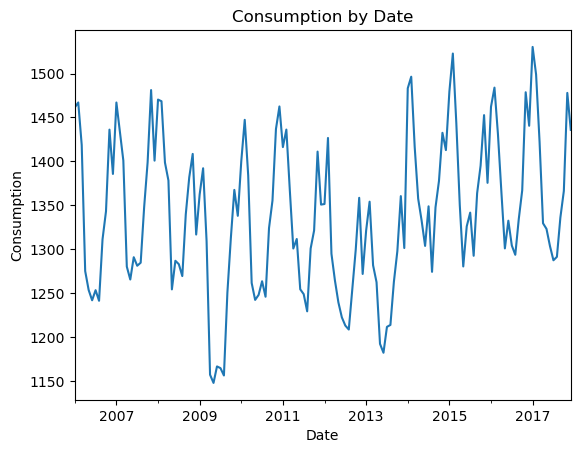

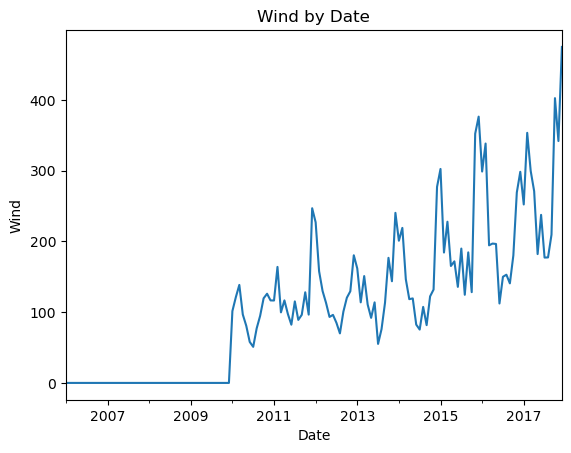

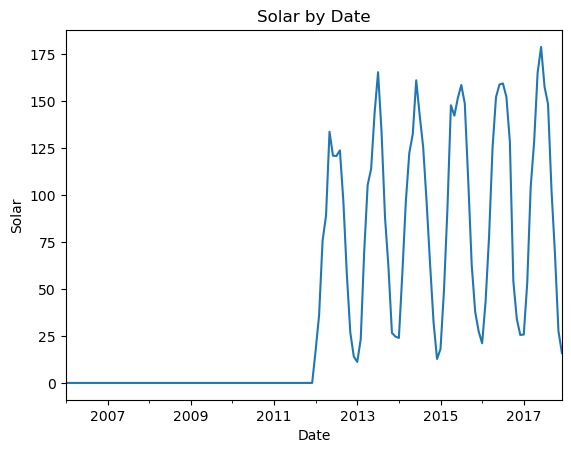

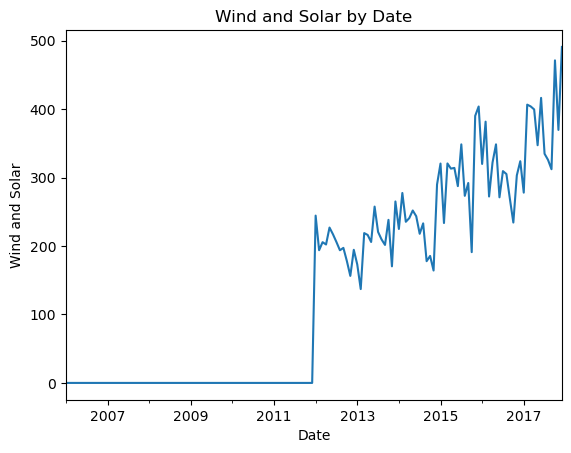

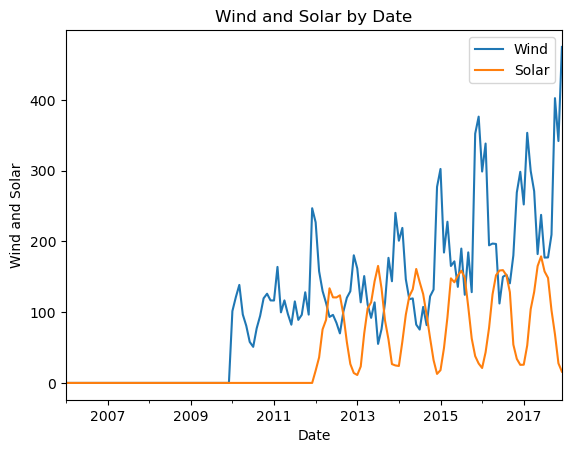

In [72]:
opsd_plots(op)